In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import re
import warnings
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score, classification_report

### 1. Data exploration and preprocessing

#### Load Dataset

In [3]:
blog = pd.read_csv("C:\\Users\\hp\\Downloads\\blogs.csv",encoding = "ISO-8859-1")
blog.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [5]:
blog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


#### Preprocess the data

In [7]:
def clean_Data(Data, remove_stopwords=True, use_stemming=False, use_lemmatization=False):
    
    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    # Lowercase the text
    Data = Data.lower()
    # Remove punctuation
    Data = re.sub(r'[^\w\s]', '', Data)
    # Remove numbers
    Data = re.sub(r'\d+', '', Data)
    # Tokenize the text
    tokens = Data.split()
    if remove_stopwords:
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
    if use_stemming:
        # Apply stemming
        tokens = [stemmer.stem(word) for word in tokens]
    if use_lemmatization:
        # Apply lemmatization
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

clean = lambda x: clean_Data(x)

In [9]:
blog['cleaned_Data'] = blog.Data.apply(clean)
blog

,Data,Labels,cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion altath...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc ta...
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins talkrel...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc al...


#### Convert text data into TFIdf vectorizer

In [11]:
# Feature extraction
vectorizer = TfidfVectorizer(max_df= 1000, max_features= 10000)
x = vectorizer.fit_transform(blog['cleaned_Data'])
y = blog['Labels']

### 2. Naive Bayes Classifier

#### Split the data

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1600, 10000) (400, 10000) (1600,) (400,)


#### Multinomial Naive Bayes

In [15]:
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#### Evaluation

In [17]:
print("Classification Report for train:\n", classification_report(y_train, model.predict(x_train)))
print("Classification Report for test:\n", classification_report(y_test, y_pred))

Classification Report for train:
                           precision    recall  f1-score   support

             alt.atheism       0.93      0.99      0.96        82
           comp.graphics       1.00      0.99      0.99        82
 comp.os.ms-windows.misc       0.99      0.99      0.99        78
comp.sys.ibm.pc.hardware       0.97      0.99      0.98        75
   comp.sys.mac.hardware       1.00      1.00      1.00        79
          comp.windows.x       1.00      1.00      1.00        75
            misc.forsale       0.99      1.00      0.99        82
               rec.autos       1.00      1.00      1.00        82
         rec.motorcycles       1.00      0.99      0.99        84
      rec.sport.baseball       1.00      1.00      1.00        82
        rec.sport.hockey       1.00      1.00      1.00        85
               sci.crypt       1.00      1.00      1.00        81
         sci.electronics       1.00      1.00      1.00        84
                 sci.med       1.00      

#### Gaussian Naive Bayes

In [19]:
model2= GaussianNB()
model2.fit(x_train.toarray(), y_train)
y_pred_G = model2.predict(x_test.toarray())

In [21]:
print("Classification Report for train:\n", classification_report(y_train, model2.predict(x_train.toarray())))
print("Classification Report for test:\n", classification_report(y_test, y_pred_G))

Classification Report for train:
                           precision    recall  f1-score   support

             alt.atheism       1.00      1.00      1.00        82
           comp.graphics       1.00      1.00      1.00        82
 comp.os.ms-windows.misc       1.00      1.00      1.00        78
comp.sys.ibm.pc.hardware       1.00      1.00      1.00        75
   comp.sys.mac.hardware       1.00      1.00      1.00        79
          comp.windows.x       1.00      1.00      1.00        75
            misc.forsale       1.00      1.00      1.00        82
               rec.autos       1.00      1.00      1.00        82
         rec.motorcycles       1.00      1.00      1.00        84
      rec.sport.baseball       1.00      1.00      1.00        82
        rec.sport.hockey       1.00      1.00      1.00        85
               sci.crypt       1.00      1.00      1.00        81
         sci.electronics       1.00      1.00      1.00        84
                 sci.med       1.00      

### 3. Sentiment Analysis

In [23]:
def get_sentiment(cleaned_Data):
    blob = TextBlob(cleaned_Data)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

In [25]:
blog['Sentiment'] = blog['cleaned_Data'].apply(get_sentiment)
blog

,Data,Labels,cleaned_Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...,negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,positive
...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion altath...,positive
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc ta...,positive
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins talkrel...,positive
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc al...,positive


In [27]:
sentiment_counts = blog['Sentiment'].value_counts()
sentiment_counts

Sentiment
positive    1453
negative     544
neutral        3
Name: count, dtype: int64

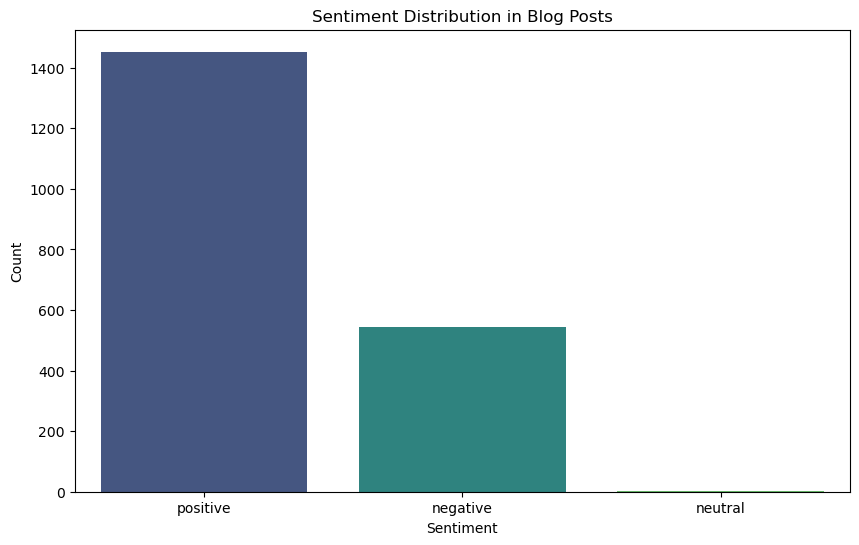

In [29]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution in Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [33]:
total_posts = len(blog)
positive_posts = sentiment_counts.get('positive', 0)
negative_posts = sentiment_counts.get('negative', 0)
neutral_posts = sentiment_counts.get('neutral', 0)

print(f"Total Blogs: {total_posts}")
print(f"Positive Blogs: {positive_posts} ({positive_posts/total_posts:.2%})")
print(f"Negative Blogs: {negative_posts} ({negative_posts/total_posts:.2%})")
print(f"Neutral Blogs: {neutral_posts} ({neutral_posts/total_posts:.2%})")

Total Blogs: 2000
Positive Blogs: 1453 (72.65%)
Negative Blogs: 544 (27.20%)
Neutral Blogs: 3 (0.15%)


### 4. Evaluation

#### Multinomial Naive Bayes Classifier

***Training Set Performance:***
1. **Overall Accuracy:** 99%
2. **Precision:** Average of 99%, which means that most of the predicted labels are correct.
3. **Recall:** Average of 99%, indicating that the model identifies almost all instances of each class.
4. **F1-Score:** Average of 99%, a balance of precision and recall, showing overall high performance.

The model performs exceptionally well on the training set, with near-perfect scores across all metrics. This suggests that the model is well-trained and fits the training data very effectively.

***Test Set Performance:***
1. **Overall Accuracy:** 85%
2. **Precision:** Average of 85%, which is lower than the training set but still indicates good performance in terms of correctly identifying positive instances of each class.
3. **Recall:** Average of 86%, slightly higher than precision, showing good coverage of each class.
4. **F1-Score:** Average of 84%, reflecting a balance between precision and recall, though lower than on the training set.

1. **Drop in Performance:** There is a significant drop in performance from the training set to the test set. The accuracy, precision, recall, and F1-score on the test set are notably lower. This indicates that the model struggles to generalize to unseen data, which is a common issue known as overfitting.
2. **Consistency:** While precision, recall, and F1-scores are still good, the drop shows that the model's predictions are less reliable on new data compared to the training data.

The sentiment analysis reveals that the blog posts primarily express positive sentiments, with a notable portion also expressing negative sentiments. The very low neutral sentiment suggests that the content is highly opinionated or emotionally charged. By reflecting on these results, you can refine your content strategy to enhance positive engagement, address negative feedback, and consider incorporating more neutral content if it aligns with your goals.